In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/housing/housing.csv


In [2]:
df = pd.read_csv("/kaggle/input/housing-price-prediction/housing/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df[df["ocean_proximity"] == "<1H OCEAN"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [7]:
df[pd.notnull(df)].count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [8]:
pd.isnull(df["total_bedrooms"]).sum()

207

In [9]:
pd.set_option('display.max_rows', 10)
df[df['total_bedrooms'].isna()][["total_rooms","population"]]

,total_rooms,population
290,1256.0,570.0
341,992.0,732.0
538,5154.0,3741.0
563,891.0,384.0
696,746.0,387.0
...,...,...
20267,3620.0,3171.0
20268,2393.0,1938.0
20372,4260.0,1701.0
20460,5512.0,2734.0


In [10]:
predict_null_values_in_total_bedrooms = df[["total_bedrooms", "total_rooms", "population"]]

In [11]:
predict_null_values_in_total_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bedrooms  20433 non-null  float64
 1   total_rooms     20640 non-null  float64
 2   population      20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [12]:
index_predict_null = predict_null_values_in_total_bedrooms[predict_null_values_in_total_bedrooms['total_bedrooms'].isna()].index

In [13]:
index_predict_null

Int64Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
             1493,
            ...
            19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460,
            20484],
           dtype='int64', length=207)

In [14]:
test_predict_null_values_in_total_bedrooms = predict_null_values_in_total_bedrooms.iloc[index_predict_null]

In [15]:
test_predict_null_values_in_total_bedrooms

,total_bedrooms,total_rooms,population
290,NaN,1256.0,570.0
341,NaN,992.0,732.0
538,NaN,5154.0,3741.0
563,NaN,891.0,384.0
696,NaN,746.0,387.0
...,...,...,...
20267,NaN,3620.0,3171.0
20268,NaN,2393.0,1938.0
20372,NaN,4260.0,1701.0
20460,NaN,5512.0,2734.0


In [16]:
# Drop null values and keep only values with null
train_predict_null_values_in_total_bedrooms = predict_null_values_in_total_bedrooms.dropna()
train_predict_null_values_in_total_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bedrooms  20433 non-null  float64
 1   total_rooms     20433 non-null  float64
 2   population      20433 non-null  float64
dtypes: float64(3)
memory usage: 638.5 KB


In [17]:
#Normalizing the training data
from sklearn import preprocessing
x_min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = x_min_max_scaler.fit_transform(train_predict_null_values_in_total_bedrooms[["total_rooms", "population"]])
X_train_predict_null_values_in_total_bedrooms = pd.DataFrame(X_train_minmax).values
y_min_max_scaler = preprocessing.MinMaxScaler()
y_train_minmax = y_min_max_scaler.fit_transform(train_predict_null_values_in_total_bedrooms["total_bedrooms"].values.reshape(-1,1))
y_train_predict_null_values_in_total_bedrooms = pd.DataFrame(y_train_minmax).values

In [18]:
X_train_predict_null_values_in_total_bedrooms.shape

(20433, 2)

In [19]:
y_train_predict_null_values_in_total_bedrooms.shape

(20433, 1)

In [20]:
#seprate target and features
#X_train_predict_null_values_in_total_bedrooms = train_predict_null_values_in_total_bedrooms[["total_rooms","population"]].values
#y_train_predict_null_values_in_total_bedrooms = train_predict_null_values_in_total_bedrooms["total_bedrooms"].values

In [21]:
#X_train_predict_null_values_in_total_bedrooms = X_train_predict_null_values_in_total_bedrooms.reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression
reg_bedrooms = LinearRegression().fit(X_train_predict_null_values_in_total_bedrooms, y_train_predict_null_values_in_total_bedrooms)

In [23]:
test_predict_null_values_in_total_bedrooms.head()

,total_bedrooms,total_rooms,population
290,NaN,1256.0,570.0
341,NaN,992.0,732.0
538,NaN,5154.0,3741.0
563,NaN,891.0,384.0
696,NaN,746.0,387.0


In [24]:
#Transform fetaures
feature_transform = x_min_max_scaler.transform(test_predict_null_values_in_total_bedrooms[["total_rooms", "population"]])

In [25]:
feature_transform.shape

(207, 2)

In [26]:
bedrooms_target = reg_bedrooms.predict(feature_transform)

In [27]:
bedrooms_target = y_min_max_scaler.inverse_transform(bedrooms_target.reshape(-1,1))

In [28]:
#shape of output values
bedrooms_target.shape

(207, 1)

In [29]:
#Filling the null value with the predicted values
df.loc[index_predict_null, "total_bedrooms"] = bedrooms_target

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [33]:
df.drop(df[df["ocean_proximity"] == "ISLAND"].index, inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20635 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [35]:
df = pd.get_dummies(df, columns = ["ocean_proximity"])

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [37]:
df["avgrooms"] = df["total_rooms"]/df["households"]
df["avgbedrooms"] = df["total_bedrooms"]/df["households"]
df.drop(["total_bedrooms","total_rooms","households"], axis=1, inplace=True)

In [38]:
df.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,0,0,1,0,6.281853,1.081081


In [39]:
pd.set_option('display.max_rows', 13)
df.corr()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms
longitude,1.000000,-0.924676,-0.108394,0.099881,-0.015090,-0.046208,0.321297,-0.055480,-0.474465,0.045568,-0.027558,0.013339
latitude,-0.924676,1.000000,0.011462,-0.108978,-0.079977,-0.143837,-0.447303,0.351058,0.358735,-0.160942,0.106431,0.069993
housing_median_age,-0.108394,0.011462,1.000000,-0.296172,-0.118949,0.105272,0.045551,-0.236537,0.255333,0.021729,-0.153422,-0.077517
population,0.099881,-0.108978,-0.296172,1.000000,0.004737,-0.024421,0.074480,-0.020845,-0.060942,-0.024328,-0.072207,-0.067513
median_income,-0.015090,-0.079977,-0.118949,0.004737,1.000000,0.688563,0.168772,-0.237618,0.056150,0.027290,0.326915,-0.058749
median_house_value,-0.046208,-0.143837,0.105272,-0.024421,0.688563,1.000000,0.257049,-0.484794,0.160467,0.142051,0.151968,-0.046570
ocean_proximity_<1H OCEAN,0.321297,-0.447303,0.045551,0.074480,0.168772,0.257049,1.000000,-0.607909,-0.314925,-0.342742,-0.099558,-0.087924
ocean_proximity_INLAND,-0.055480,0.351058,-0.236537,-0.020845,-0.237618,-0.484794,-0.607909,1.000000,-0.240963,-0.262246,0.151135,0.129397
ocean_proximity_NEAR BAY,-0.474465,0.358735,0.255333,-0.060942,0.056150,0.160467,-0.314925,-0.240963,1.000000,-0.135856,-0.029592,-0.032727
ocean_proximity_NEAR OCEAN,0.045568,-0.160942,0.021729,-0.024328,0.027290,0.142051,-0.342742,-0.262246,-0.135856,1.000000,-0.034645,-0.018750


In [47]:
X_data =  df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]]
y_data = df.iloc[:,5]

In [48]:
X_data.head()

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms
0,-122.23,37.88,41.0,322.0,8.3252,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,8.3014,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,7.2574,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,5.6431,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,3.8462,0,0,1,0,6.281853,1.081081


In [49]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
rho, phi = cart2pol(X_data["longitude"].values,
                            X_data["latitude"].values)

In [50]:
X_data["rho"] = rho
X_data["phi"] = phi

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.20,
                                                    random_state=42, shuffle=True)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [52]:
#Normalizing the training data
from sklearn import preprocessing

x_min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = x_min_max_scaler.fit_transform(X_train)


y_min_max_scaler = preprocessing.MinMaxScaler()
y_train_minmax = y_min_max_scaler.fit_transform(y_train.reshape(-1,1))

In [53]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [55]:
'''rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train_minmax, y_train_minmax)
print ('Random grid: ', random_grid, '\n')
#print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')'''

"rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,\n               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)\nrf_random.fit(X_train_minmax, y_train_minmax)\nprint ('Random grid: ', random_grid, '\n')\n#print the best parameters\nprint ('Best Parameters: ', rf_random.best_params_, ' \n')"

In [56]:
randmf = RandomForestRegressor(n_estimators = 150, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 100, bootstrap=False) 
randmf.fit( X_train_minmax, y_train_minmax)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=6, n_estimators=150)

In [57]:
#x_test_min_max_scaler = preprocessing.MinMaxScaler()
X_test_minmax = x_min_max_scaler.transform(X_test)


#y_test_min_max_scaler = preprocessing.MinMaxScaler()
y_test_minmax = y_min_max_scaler.transform(y_test.reshape(-1,1))

In [58]:
y_pred_rf1 = randmf.predict(X_test_minmax)

In [59]:
y_pred_rf1

array([0.85042481, 0.28431825, 0.51493419, ..., 0.34676673, 0.38606017,
       0.31765262])

In [60]:
y_pred_rf1_reverse = y_min_max_scaler.inverse_transform(y_pred_rf1.reshape(-1,1))
#y_pred_rf1

In [61]:
from sklearn import metrics
import math
mse = metrics.mean_squared_error(y_test, y_pred_rf1_reverse)  
rmse = math.sqrt(mse)  
print(rmse)

44582.08374044584


In [62]:
#Predict the model using Bayesian Linear Regression
df_adj  = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
df_adj.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,0,0,1,0,6.281853,1.081081


In [63]:
df_squared = df.iloc[:,[2,3,4,10,11]].pow(2)
df_squared["median_house_value"] = df_adj["median_house_value"]

<AxesSubplot:>

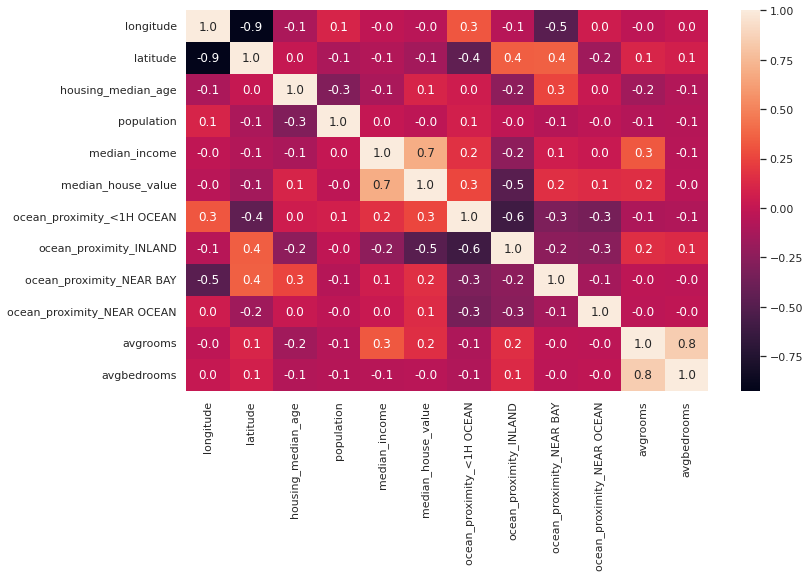

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,7)})
sns.heatmap(df_adj.corr(), annot=True, fmt=".1f")

<AxesSubplot:>

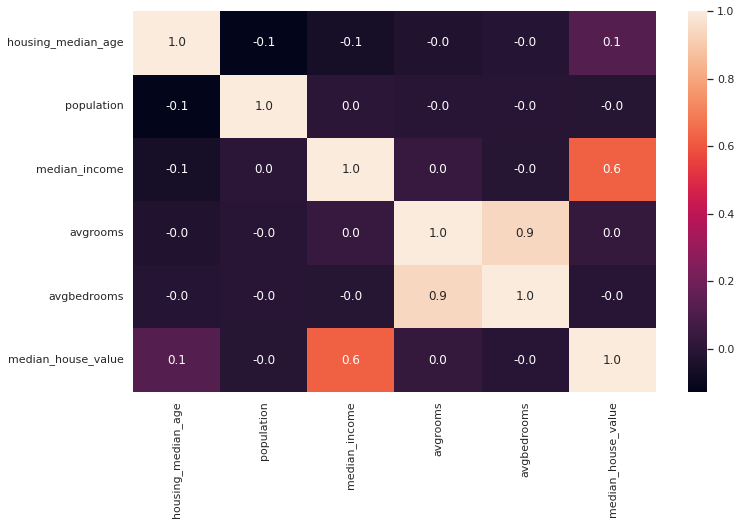

In [65]:
sns.heatmap(df_squared.corr(), annot=True, fmt=".1f")

In [66]:
df_adj["median_income"] = df_adj["median_income"].pow(2)
df_adj.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms
0,-122.23,37.88,41.0,322.0,69.308955,452600.0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,68.913242,358500.0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,52.669855,352100.0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,31.844578,341300.0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,14.793254,342200.0,0,0,1,0,6.281853,1.081081


In [67]:
#Preper Features and target
X_data = df_adj.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]]
y_data = df_adj.iloc[:, 5]

In [68]:
#convert longitude & Latitude to polar
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
rho, phi = cart2pol(X_data["longitude"].values,
                                    X_data["latitude"].values)

In [69]:
X_data["rho"] = rho
X_data["phi"] = phi

In [70]:
X_data.head()

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avgrooms,avgbedrooms,rho,phi
0,-122.23,37.88,41.0,322.0,69.308955,0,0,1,0,6.984127,1.023810,127.965102,2.841071
1,-122.22,37.86,21.0,2401.0,68.913242,0,0,1,0,6.238137,0.971880,127.949631,2.841197
2,-122.24,37.85,52.0,496.0,52.669855,0,0,1,0,8.288136,1.073446,127.965777,2.841318
3,-122.25,37.85,52.0,558.0,31.844578,0,0,1,0,5.817352,1.073059,127.975330,2.841342
4,-122.25,37.85,52.0,565.0,14.793254,0,0,1,0,6.281853,1.081081,127.975330,2.841342


In [71]:
#Split data to xtrain & y_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=42, shuffle=True)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [72]:
#Normalizing the training data
from sklearn import preprocessing

x_min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = x_min_max_scaler.fit_transform(X_train)


y_min_max_scaler = preprocessing.MinMaxScaler()
y_train_minmax = y_min_max_scaler.fit_transform(y_train.reshape(-1,1))

In [73]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights='distance')
knn.fit(X_train_minmax, y_train_minmax)

'''from sklearn.svm import SVR
svr_poly = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_poly.fit(X_train_minmax, y_train_minmax)'''

'from sklearn.svm import SVR\nsvr_poly = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)\nsvr_poly.fit(X_train_minmax, y_train_minmax)'

In [74]:
#Normalize the test data
#x_test_min_max_scaler = preprocessing.MinMaxScaler()
X_test_minmax = x_min_max_scaler.transform(X_test)


#y_test_min_max_scaler = preprocessing.MinMaxScaler()
y_test_minmax = y_min_max_scaler.transform(y_test.reshape(-1,1))

In [75]:
#the predicted Value
svr_prediction = knn.predict(X_test_minmax)

In [76]:
# inverse the sclaed y_prediciton
svr_prediction_reverse = y_min_max_scaler.inverse_transform(svr_prediction.reshape(-1,1))

In [77]:
#Calculate the rms for svr_prediction_reverse
mse = metrics.mean_squared_error(y_test, svr_prediction_reverse)  
rmse = math.sqrt(mse)  
print(rmse)

59156.4697224235


In [78]:
avag_values_y_svr_rfr = (svr_prediction_reverse + y_pred_rf1_reverse)/2

In [79]:
mse = metrics.mean_squared_error(y_test, avag_values_y_svr_rfr)  
rmse = math.sqrt(mse)  
print(rmse)

49216.18435317026


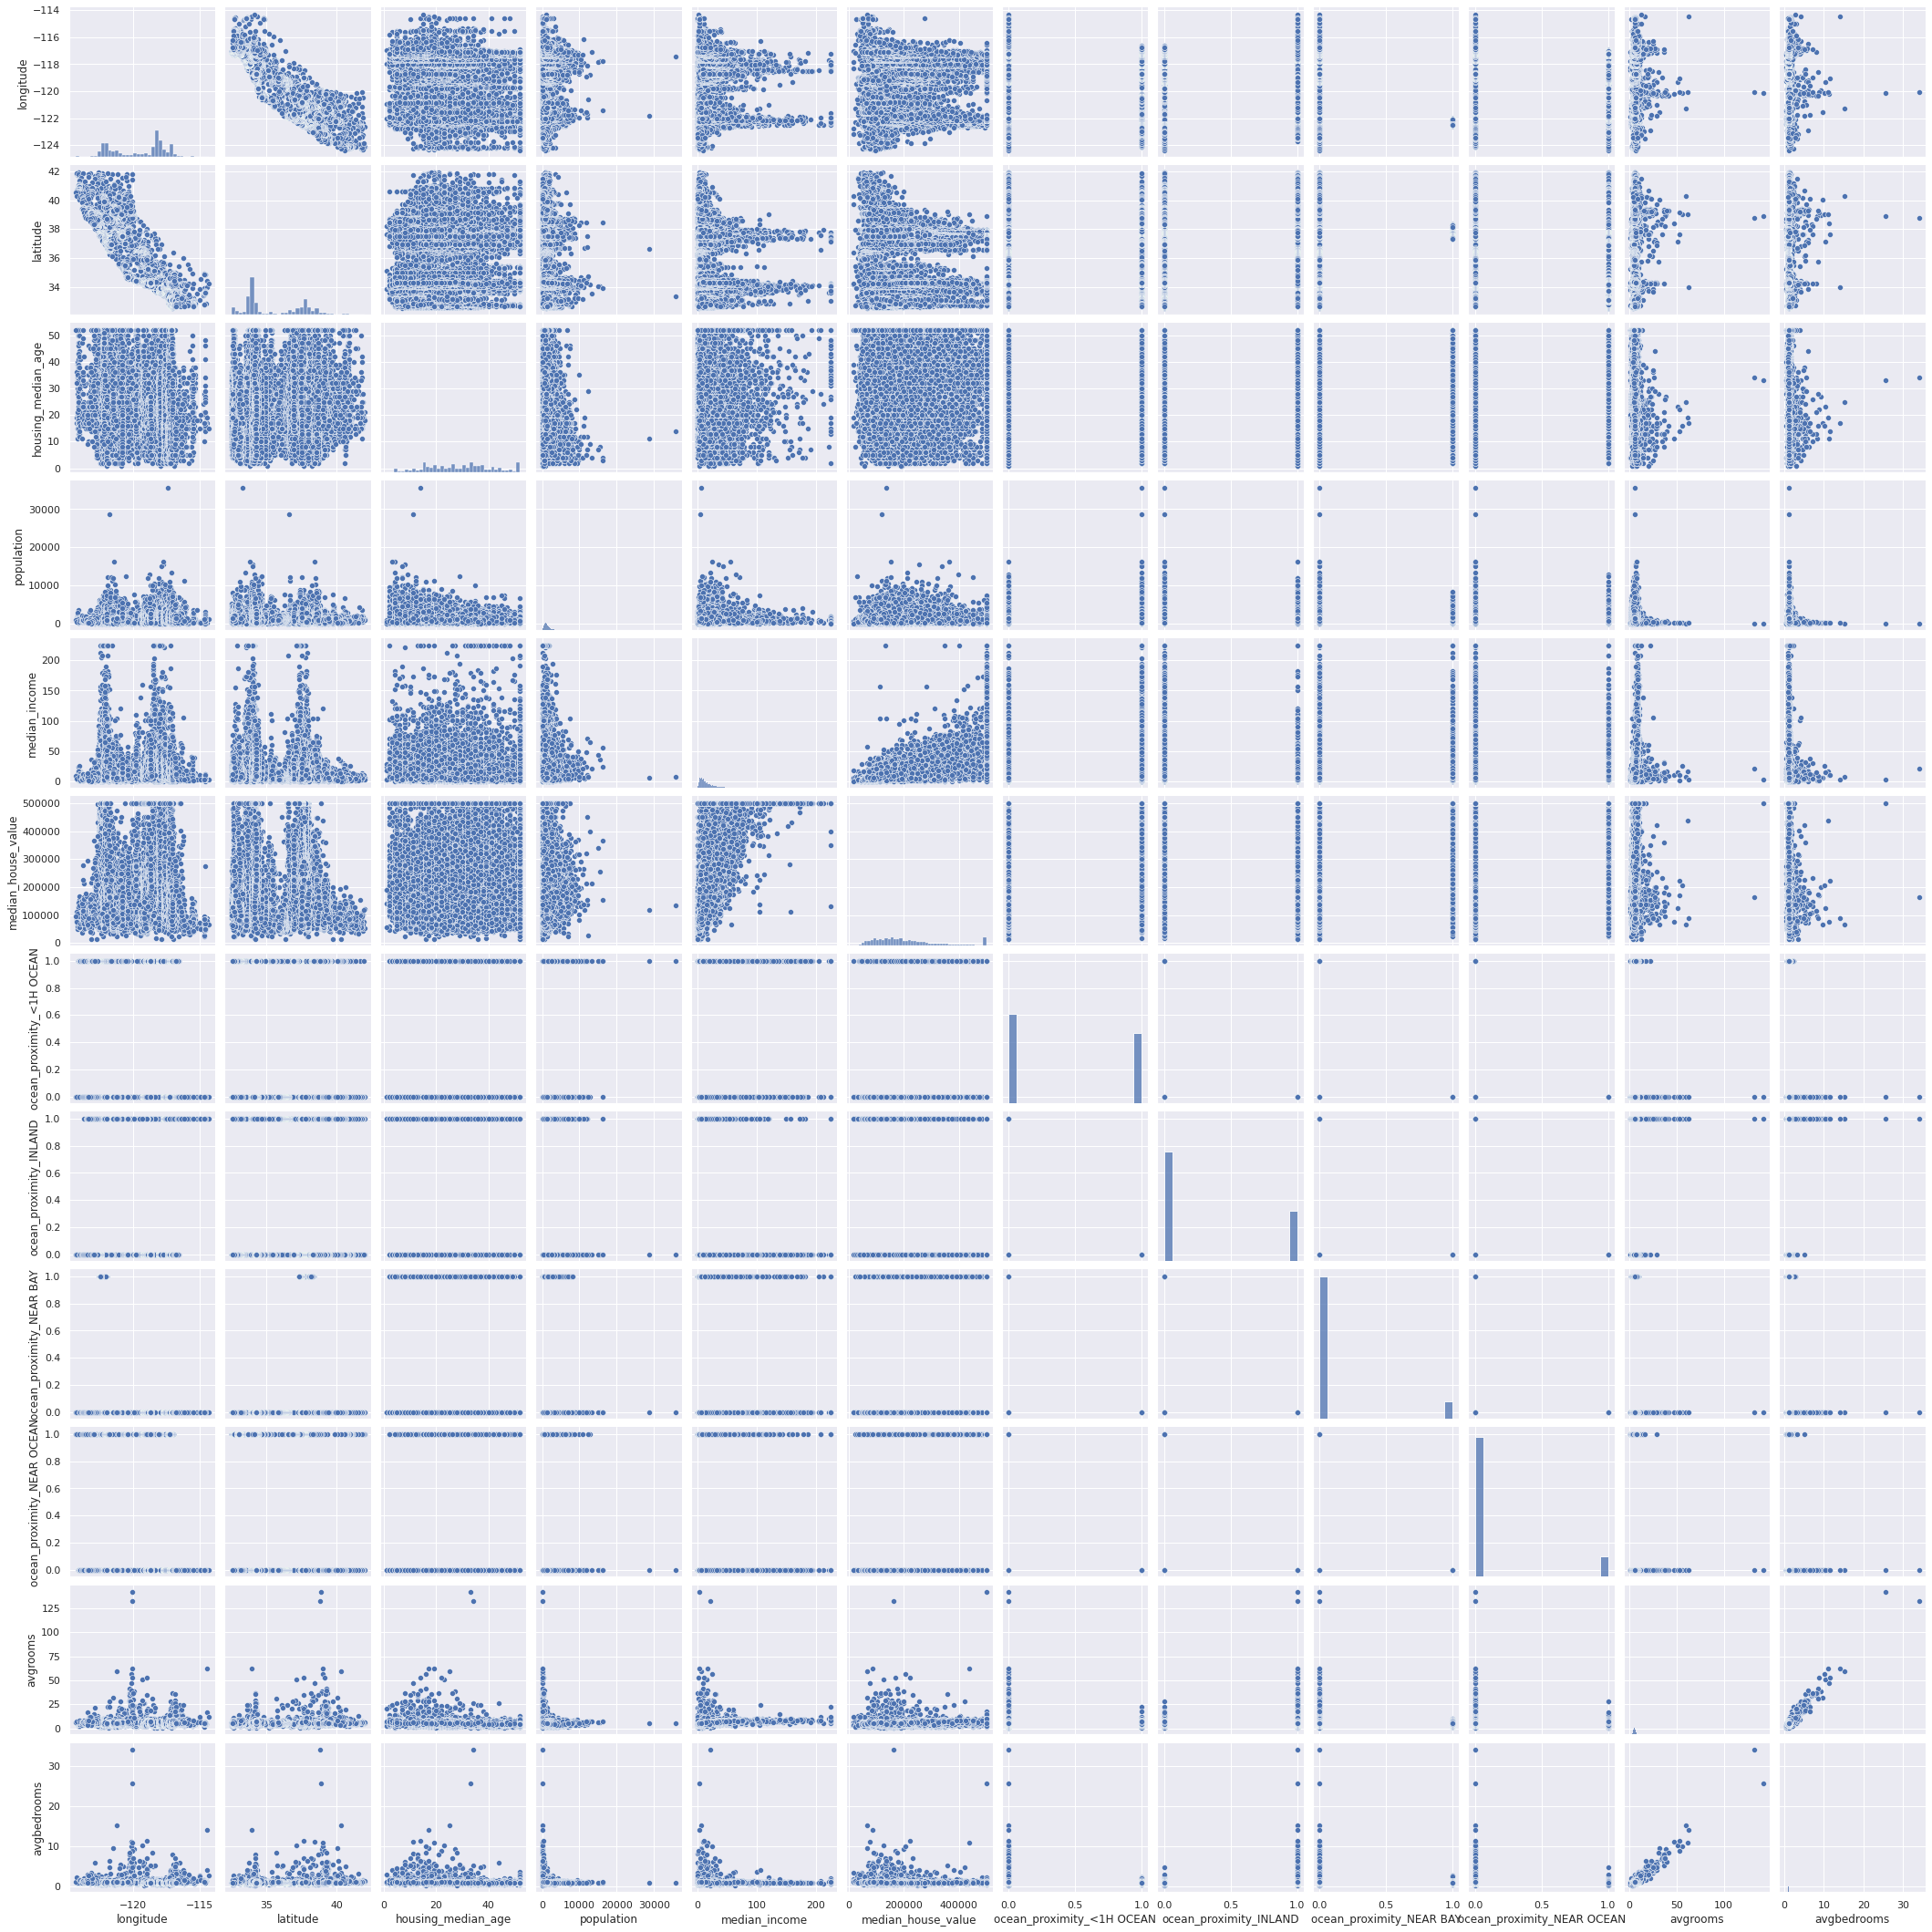

In [80]:
sns.pairplot(df_adj)